<a id="top"></a>  
# Fairness Analysis of Heart Disease Model
---


---
#  1.  Data Collection <a id="coll"></a>
Import Python libraries and load the dataset.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [31]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
#df = pd.read_csv('heart.csv')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/heart.csv')
df.shape

(303, 14)

[go to top of document](#top)     

---
#  2.  Data Preparation <a id="prep"></a>

## 2.1 Check for NULLs/Duplicates <a id="prep_null"></a>
Cleaning up the NULL and duplicate values in the dataset.

In [33]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))


--- NULL count ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1st DUPLICATE count:	1
2nd DUPLICATE count:	0


## 2.2 Feature Engineering <a id="prep_name"></a>
Rename columns (attributes) for better readability.

| Original Attribute Name | New Attribute Name   |  Description |
| :-- | :--  | :--- |
|**age**|age|age of patient
|**sex**|sex|sex of patient:  0 = female; 1 = male
|**cp**|chest_pain_type|chest pain type (4 values)
|**trestbps**|resting_blood_pressure|resting blood pressure
|**chol**|cholestoral|serum cholestoral in mg/dl
|**fbs**|fasting_blood_sugar|fasting blood sugar > 120 mg/dl
|**restecg**|resting_electrocardiographic|resting electrocardiographic results (values 0,1,2)
|**thalach**|maximum_heart_rate|maximum heart rate achieved
|**exang**|exercise_induced_angina|exercise induced angina
|**oldpeak**|ST_depression|oldpeak = ST depression induced by exercise relative to rest
|**slope**|slope_peak_exercise_ST|slope of the peak exercise ST segment
|**ca**|number_of_major_vessels|number of major vessels (0-3) colored by flourosopy
|**thal**|thal|thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [34]:
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


**Update categorical attribute values (features) for better readability & plotting.**

| Attribute   | Updated Feature Values 
| :-- | :-- 
|**sex** |0:female<br>1:male|
|**chest_pain_type** | 0:typical angina<br>1:atypical angina<br><br>2:non-anginal<br>3:asymptomatic|
|**fasting_blood_sugar** |0:> 120 mg/dl<br>1:< 120 mg/dl|
|**resting_electrocardiographic** |0:normal<br>1:ST-T wave abnormality<br>2:ventricular hypertrophy|
|**exercise_induced_angina** |0:no<br>1:yes|
|**slope_peak_exercise_ST** |0:upsloping<br>1:flat<br>2:downsloping|
|**thal** |0:normal 0<br>1:normal 1<br>2:fixed defect<br>3:reversable defect|
|**target** |0:no disease<br>1:disease|

In [35]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


[go to top of document](#top)     

---
#  5.  Model - Logistic Regression<a id="model"></a>

##  5.1  One Hot Encoding <a id="model_oneH"></a>
Machine learning algorithms cannot process categorical or text data unless they have been converted to numbers.  **One hot encoding** maps categorical values to integer values, which are represented as a binary vector that are all zero values, except the index of the integer, which is set to 1.

In [9]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_peak_exercise_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


In [10]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,63,145,233,150,2.3,1
1,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,37,130,250,187,3.5,1
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,41,130,204,172,1.4,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,57,120,354,163,0.6,1


##  5.2  Normalize Data <a id="model_norm"></a>
Normalization is a rescaling of the data from the original range so that all values are within a certain range, typically between 0 and 1.  Normalized data is essential in machine learning.  Correlation and models will not produce good results if the scales are not standardized.

Using **MixMaxScalar** to keep the 'sex' columns as '0' and '1'.  **StandardScaler** converts the 'sex' columns as -0.68 & 1.46 for female and -1.46 & 0.68 for male.

In [11]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.70833333, 0.48113208, 0.24429224, 0.60305344, 0.37096774,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33962264, 0.28310502, 0.88549618, 0.56451613,
        1.        ]])

Finally, create the dataframe that can be used for machine learning with the One Hot Encoding and Normalized data.

In [12]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1.0


The original dataframe (**df**) now had One Hot Encoding and Normalized data and is ready for machine learning.

##  5.4  Train/Test Split <a id="model_split"></a>
Train/Test Split randomly splits a dataset into training and testing subsets.  The model learns on the training set based on known output, and the test data is used to evaluate the accuracy of the model.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'sex_female'], axis = 1) #Added by FK to make this fit with AIF 360
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 29) (241,)
Test set:    (61, 29) (61,)


##  5.5  Classification Model - Logistic Regression<a id="model_lr"></a>   
In machine learning, **classification** is a *supervised* learning approach which attempts to learn the relationship between a set of feature variables and a target variable. The target attribute in classification is a categorical variable with discrete values.

**Logistic regression** is a classification algorithm for categorical variables.  Logistic regression is analogous to linear regression, but tries to predict a categorical or discrete target field, such as 0 or 1, yes or no, etc., instead of a numeric one.


In [14]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

**Predict** generates output predictions from the input samples and is used for evaluating the model.

In [15]:
#  predict
y_predict = LR.predict(X_test)
y_predict[0:10]

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.])

[go to top of document](#top)     

---
#  6.  Evaluate the Model  <a id="eval"></a>
This section will evalute the Logistic Regression model.

##  6.1 Cross Validation Score<a id="eval_cv"></a>   
**Cross Validation Score** splits the dataset into K equal groups. Each group is referred to as a fold.  Some of the folds are used for training and the reamaining for testing the model.  The process is repeated until each partition is used for both training and testing.

In [16]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy'))
print('Cross Validation Score (mean):  {:3.4%}'.format(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy').mean()))

[0.75510204 0.85416667 0.89583333 0.75       0.91666667]
Cross Validation Score (mean):  83.4354%


##  6.2 Accuracy Score<a id="eval_acc"></a>   
**Accuracy Score** function computes subset accuracy in a multilabel classification dataset and is equal to the **Jaccard Score** function in binary and multiclass classification.

In [17]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:  {:3.4%}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score:  85.2459%


##  6.3 F1 Score<a id="eval_f1"></a>   
**F1 Score** is the weighted average of Precision and Recall.

In [18]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_predict)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  88.0000%


##  6.4 Confusion Matrix<a id="eval_conf"></a>   
Confusion matrix shows the corrected and wrong predictions, in comparison with the actual labels. It shows the model’s ability to correctly predict or separate the classes.

   - **True Positive** – model predicted positive class correctly to be a positive class
   - **False Positive** – model predicted negative class incorrectly to be a positive class
   - **False Negative** – model predicted positive class incorrectly to be the negative class
   - **True Negative** – model predicted negative class correctly to be the negative class

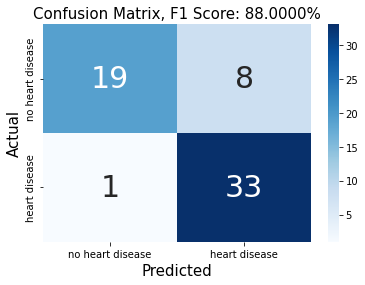

True Positive:	33
True Negative:	19
False Positive:	8
False Negative:	1


In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

x_axis_labels =['no heart disease','heart disease']
y_axis_labels =['no heart disease','heart disease']

sns.heatmap(conf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True,cmap='Blues',annot_kws={"size": 30})
#sns.heatmap(conf_matrix, annot=True,cmap='Blues',annot_kws={"size": 30})
plt.title("Confusion Matrix, F1 Score: {:3.4%}".format(f1score), fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show()

print('True Positive:\t{}'.format(conf_matrix[1,1]))
print('True Negative:\t{}'.format(conf_matrix[0,0]))
print('False Positive:\t{}'.format(conf_matrix[0,1]))
print('False Negative:\t{}'.format(conf_matrix[1,0]))

##  6.5 Receiver Operating Characteristics (ROC) Curve<a id="eval_roc"></a>   
AUC–ROC curve is the model selection probability curve. AUC area is covered by the curve is the area between the orange line (ROC) and the axis.  The bigger the area covered, the better the machine learning models. Ideal value for AUC is 1.

*  **ROC** - Receiver Operating Characteristics
*  **AUC** - Area Under the Curve

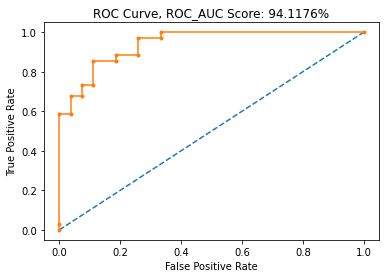

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR.probability = True   # need for predict_proba to work
LR.fit(X_train,y_train)
y_predita = LR.predict_proba(X_test)
y_predita = y_predita[:,1]   # positive values only
    
ROC_AUC = roc_auc_score(y_test, y_predita)
fpr, tpr, thresholds = roc_curve(y_test, y_predita)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve, ROC_AUC Score: {:3.4%}".format(ROC_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##  6.6 Classification Report<a id="eval_class"></a>   
**Precision** is a measure of the accuracy, provided that a class label has been predicted. It is defined by:   
    ```precision = True Positive/(True Positive + False Positive)```   
    
**Recall** is the true positive rate:    
    ```recall = True Positive/(True Positive + False Negative)```   
    
**F1-Score** is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (which represents perfect precision and recall) and its worst at 0    
    ```F1-Score = 2x (precision x recall)/ (precision + recall)```

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81        27
         1.0       0.80      0.97      0.88        34

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.84        61
weighted avg       0.87      0.85      0.85        61



##  6.7 Log Loss<a id="eval_log"></a>   
Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of machine learning models is to minimize this value. A perfect model would have a log loss of 0.

In [22]:
from sklearn.metrics import log_loss

#  predict_proba returns estimates for all classes
y_predict_prob = LR.predict_proba(X_test)
print(y_predict_prob[0:5])

print("\nLog Loss:  {:3.4}".format(log_loss(y_test, y_predict_prob)))

[[0.47811612 0.52188388]
 [0.58807101 0.41192899]
 [0.36786951 0.63213049]
 [0.42707699 0.57292301]
 [0.6687276  0.3312724 ]]

Log Loss:  0.5133


## 7. Explaining Models with SHAP

In [23]:
# Required installations
!pip install shap==0.39.0

     |████████████████████████████████| 356 kB 4.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491671 sha256=66d0d374bf763fa2a810ec43b7248eb1a472eae9d83a7b944ce58677214f3ac1
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [24]:
# Import the required modules
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from IPython.display import Image
from IPython.core.display import HTML 
import operator
from collections import defaultdict
shap.initjs()

In [25]:
# Initialize the explainer
explainer = shap.LinearExplainer(LR, X_train, feature_perturbation="interventional")
# Apply it to the test data
shap_values = explainer.shap_values(X_test)

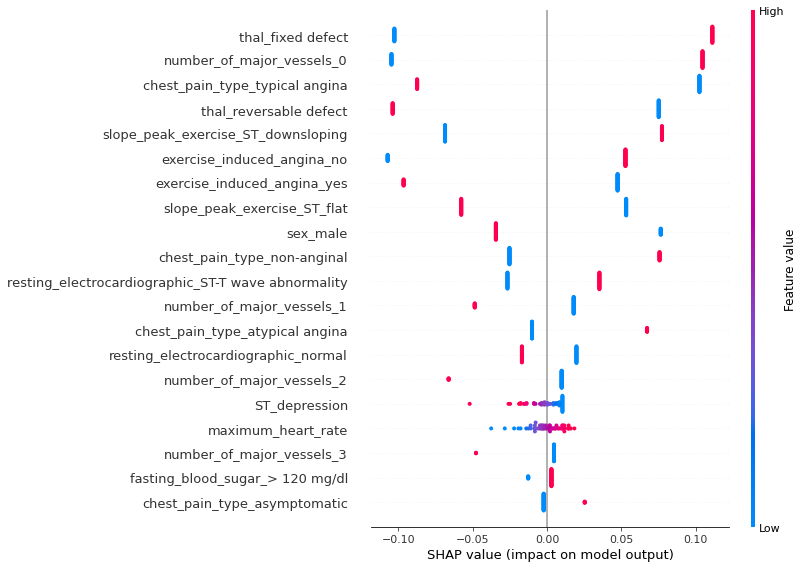

In [26]:
X_test_array = X_test.values # We need to provide the data in dense format, not sparse
shap.summary_plot(shap_values, X_test_array, feature_names=X_test.columns)

### 7.2 Prediction Decomposition

In [27]:
print(y_test.values)

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


### Correctly predicted cases,

In [ ]:
main_featsr= 

In [40]:
sum(shap_values)

array([-2.11686572e-01,  3.30974005e-03,  3.14707278e-01,  5.80063063e-01,
        1.88645116e+00, -1.39371875e-03,  5.60517965e-02,  2.94795771e-01,
        1.07790341e-01,  1.67209495e-02,  5.00281756e-01,  4.50196947e-01,
       -9.76690731e-02, -7.98274050e-02,  9.45090191e-04,  1.35912927e+00,
        2.30805663e-01,  1.46662496e-01,  1.30632302e-01,  2.60350985e-03,
        1.00883156e+00,  1.06483089e-03,  3.38794705e-02,  2.89721054e-01,
        6.15088963e-03,  2.46627864e-02,  3.10518935e-03, -2.52625643e-03,
        4.47688804e-02])

In [46]:
shap.initjs()
idx = 10
print("Heart disease" if y_test.values[idx] else "No heart disease", "Diagnosis:")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=X_test.columns, text_rotation=1
)

Heart disease Diagnosis:


In [29]:
shap.initjs()
idx = 13
print("Heart disease" if y_test.values[idx] else "No heart disease", "Diagnosis:")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=X_test.columns
)

Heart disease Diagnosis:


### Wrongly predicted cases,

In [53]:
# diff
diff = []
for i in range(len(y_test)):
  if y_test.values[i] != y_predict[i]:
      diff.append(i)

# indices of wrongly predicted
print(diff)

[0, 5, 6, 7, 18, 22, 42, 47, 55]


In [54]:
shap.initjs()
idx = 47
print("Heart disease" if y_test.values[idx] else "No heart disease", "Diagnosis:")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=X_test.columns
)

Heart disease Diagnosis:


In [55]:
shap.initjs()
idx = 6
print("Heart disease" if y_test.values[idx] else "No heart disease", "Diagnosis:")
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=X_test.columns
)

No heart disease Diagnosis:


[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]
